![](../lab%20header%20image.png)

<div style="text-align: center;">
    <h3>Experiment No. 6</h3>
</div>

<img src="../Student%20Information.png" style="width: 100%;" alt="Student Information">

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>AIM</strong>
</div>

**To perform Edge detection using OpenCV.**

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>Theory/Procedure/Algorithm</strong>
</div>

**Edge detection** is a fundamental technique in image processing and computer vision, aiming to identify points in a digital image where the image brightness changes sharply. These points usually mark boundaries of objects, textures, or other elements within an image. Detecting these edges helps in understanding the structure of objects and is widely used in various applications, such as:
- Object detection and recognition
- Image segmentation
- Motion detection
- Medical imaging
- Autonomous driving systems

Edges in an image are characterized by significant intensity changes between neighboring pixels. By identifying these changes, edge detection allows for the extraction of structural information, which can be crucial for subsequent image analysis tasks.


#### 1. Sobel Operator
The **Sobel operator** computes the gradient of image intensity using convolution with a 3x3 kernel. It emphasizes regions of high spatial frequency (edges) and approximates the first derivative of the image.

The Sobel kernels for the x and y directions are:

$$
G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}, \quad
G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
$$

The gradient magnitude is calculated as:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

Where $ G_x $ and $ G_y $ are the gradients in the x and y directions, respectively.

#### 2. Prewitt Operator
The **Prewitt operator** is similar to the Sobel operator but uses a simpler kernel with uniform weights. This operator is faster but slightly less accurate.

The Prewitt kernels are:

$$
G_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}, \quad
G_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
$$

The gradient magnitude is computed in the same way as Sobel.

#### 3. Roberts Operator
The **Roberts Cross operator** is a simple edge detection method that uses a 2x2 convolution kernel to approximate the gradient. It is computationally efficient but sensitive to noise.

The Roberts kernels are:

$$
G_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}, \quad
G_y = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}
$$

The gradient magnitude is computed as:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

#### 4. Laplacian Operator
The **Laplacian operator** detects edges by calculating the second derivative of the image. It highlights areas where the intensity changes rapidly (edges) but is sensitive to noise.

The Laplacian kernel is:

$$
L = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}
$$

It calculates the overall change in intensity at each pixel.

#### 5. Canny Edge Detection
The **Canny edge detection** algorithm is a multi-step process known for its accuracy. The steps involved are:
1. **Noise reduction**: A Gaussian filter is applied to smooth the image.
2. **Gradient calculation**: The intensity gradient is calculated using the Sobel operator.
3. **Non-maximum suppression**: Thins the edges to ensure that only the most prominent edges are retained.
4. **Double thresholding**: Classifies pixels as strong, weak, or non-edges based on intensity.
5. **Edge tracking by hysteresis**: Weak edges connected to strong edges are preserved.

The result is a set of well-defined edges that accurately represent the boundaries of objects in the image.


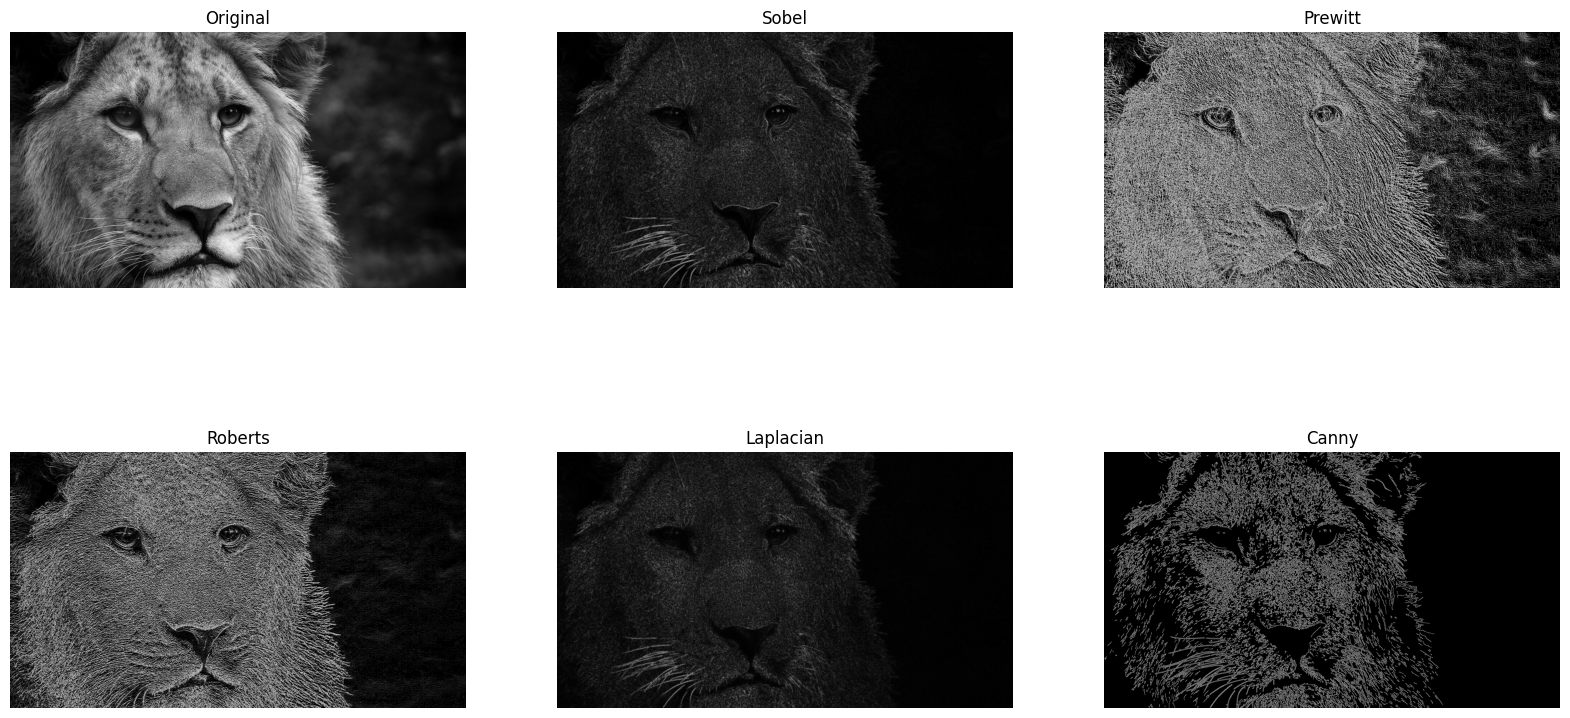

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('base.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Sobel edge detection
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)
sobel = np.uint8(sobel / sobel.max() * 255)

# Prewitt edge detection
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = cv2.filter2D(blurred, -1, kernelx)
prewitt_y = cv2.filter2D(blurred, -1, kernely)
prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt = np.uint8(prewitt / prewitt.max() * 255)

# Roberts edge detection
roberts_x = cv2.filter2D(blurred, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(blurred, -1, np.array([[0, 1], [-1, 0]]))
roberts = np.sqrt(roberts_x**2 + roberts_y**2)
roberts = np.uint8(roberts / roberts.max() * 255)

# Laplacian edge detection
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Canny edge detection
canny = cv2.Canny(blurred, 100, 200)

# Compare all results
plt.figure(figsize=(20, 10))
plt.subplot(231), plt.imshow(image), plt.title('Original'), plt.axis('off')
plt.subplot(232), plt.imshow(sobel, cmap='gray'), plt.title('Sobel'), plt.axis('off')
plt.subplot(233), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt'), plt.axis('off')
plt.subplot(234), plt.imshow(roberts, cmap='gray'), plt.title('Roberts'), plt.axis('off')
plt.subplot(235), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian'), plt.axis('off')
plt.subplot(236), plt.imshow(canny, cmap='gray'), plt.title('Canny'), plt.axis('off')

plt.show()

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>CONCLUSION</strong>
</div>

This experiment explored and compared different edge detection techniques using OpenCV, including Sobel, Prewitt, Roberts, Laplacian, and Canny edge detectors.

- **Sobel and Prewitt**: These are gradient-based operators that approximate first derivatives. Sobel tends to smooth edges slightly, while Prewitt is computationally faster but less accurate.
- **Roberts**: The Roberts operator is computationally efficient due to its 2x2 kernel but is sensitive to noise.
- **Laplacian**: This method highlights edges by calculating the second derivative, making it effective but sensitive to noise.
- **Canny**: The Canny edge detector provides the most accurate results by incorporating noise reduction, non-maximum suppression, and edge tracking.

In applications where accuracy is critical, the Canny edge detector is the preferred choice. For faster performance with acceptable results, Sobel and Prewitt can be used. Roberts and Laplacian are more suited for simpler images or specific edge detection tasks where noise isn’t an issue.

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>ASSESSMENT</strong>
</div>

<img src="../marks_distribution.png" style="width: 100%;" alt="marks_distribution">